In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read IMG

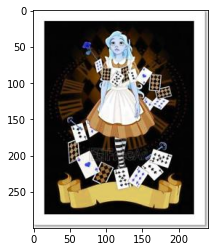

In [119]:
img = cv2.imread('img_1.png',  cv2.IMREAD_COLOR)

plt.imshow(img)
plt.show()

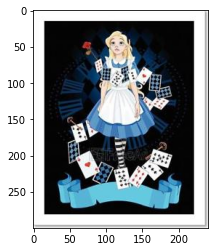

In [120]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # this converts it into RGB

plt.imshow(rgb_img)
plt.show()

# FAST & BRISK

In [121]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

kp1 = fast.detect(rgb_img, None)

In [122]:
br = cv2.BRISK_create();
_, des1 = br.compute(rgb_img,  kp)

In [123]:
des1.shape

(1385, 64)

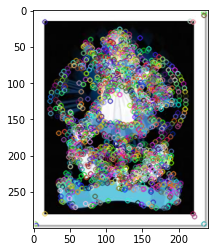

In [125]:
out = rgb_img.copy()
plt.imshow(cv2.drawKeypoints(rgb_img, kp1, out))

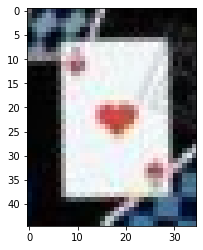

In [85]:
test_image = rgb_img.copy()
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -25, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_image = test_image[165:210, 35:70]



plt.imshow(test_image)
plt.show()

In [126]:
kp2 = fast.detect(test_image, None)
_, des2 = br.compute(test_image,  kp2)

In [127]:
des1.shape

(1385, 64)

In [128]:
br.compute(test_image,  kp2)

([<KeyPoint 0x7f3c92be8d80>,
  <KeyPoint 0x7f3c92be8e70>,
  <KeyPoint 0x7f3c92be8ed0>],
 array([[252, 255, 255, 243, 112, 224,   0,   3, 131, 199,  63, 255, 255,
         255, 255, 243, 255, 255, 255, 243, 143, 251, 184, 143, 195, 225,
         227, 239,  59, 255, 252, 255, 127, 253, 255, 128,   7,  60, 255,
         255, 255, 255, 243,  61,  63, 231, 255, 255, 255, 191,  15, 193,
          19,   0,   0,   0,   4, 131, 129, 196, 251, 223, 137,  11],
        [ 75,   0,  32,  28,  30,  63, 254, 255, 255, 127, 254, 145, 143,
          56,  64,   0, 128,  14, 255, 222, 255, 124, 207, 179, 124,  20,
         192, 225, 239, 223, 247, 255, 247, 220, 227, 143, 115, 252, 253,
         255, 255, 255, 227,  32,  12,   2,   0, 129, 193, 160, 249, 255,
         239, 243, 249, 243, 249, 255, 254, 255,  27,  12,  16,  48],
        [252, 255, 255, 255, 112,   0,   0,  67,  65, 199, 127, 255, 255,
         255, 255, 247, 223, 255, 255, 243, 143, 227,  48,  14,  65, 225,
         127, 175,  59, 255, 253

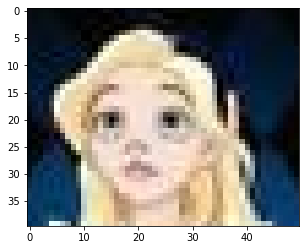

In [151]:
test_image2 = rgb_img.copy()
num_rows, num_cols = test_image2.shape[:2]

test_image2 = test_image2[25:65, 95:145]

plt.imshow(test_image2)
plt.show()

In [152]:
kp3 = fast.detect(test_image2, None)
_, des3 = br.compute(test_image2,  kp3)

# Matching OpenCV

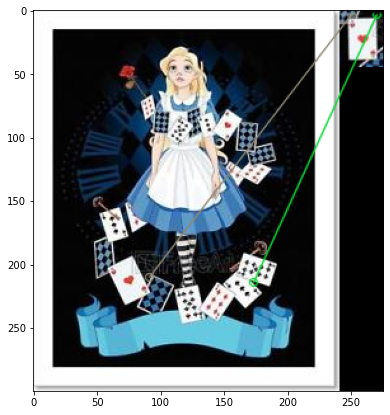

In [180]:
# create BFMatcher object 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 
# Match descriptors. 
matches = bf.match(des1, des2) 
# Sort them in the order of their distance. 
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 15 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image,kp2,matches[:15],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 


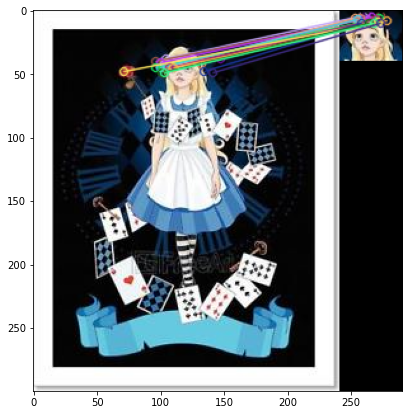

In [181]:
# create BFMatcher object 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 
# Match descriptors. 
matches4 = bf.match(des1, des3) 
# Sort them in the order of their distance. 
matches4 = sorted(matches4, key = lambda x:x.distance) 
# Draw first 15 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image2,kp3,matches4[:15],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 


# Cunsom Matcher

In [130]:
from scipy.spatial.distance import euclidean

euclidean(des1[0], des2[0])

1275.0929377892421

In [150]:
des2.shape

(3, 64)

In [131]:
(des1[0] - des2[0]) @ des1[0]

121

In [174]:
def matcher(des1: np.ndarray, des2: np.ndarray, threshold: float, distf) -> list:
    matches = []
    for i in range(len(des1)):
        for j in range(len(des2)):
            dist = distf(des1[i].reshape(1,-1), des2[j].reshape(1,-1))
            if dist < threshold:
                matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _imgIdx=0,_distance=dist))
    
    return matches

matches2 = matcher(des1, des2, 900, euclidean)

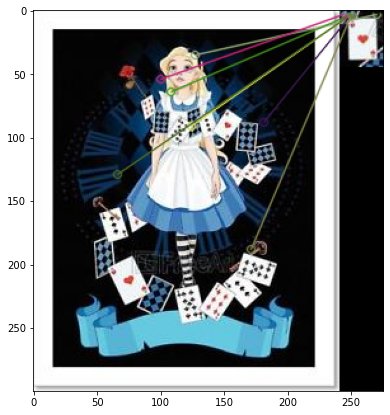

In [175]:
matches2 = sorted(matches2, key = lambda x:x.distance) 
# Draw first 10 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image,kp2,matches2[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 


In [176]:
matches2

[<DMatch 0x7f3c927c3e90>,
 <DMatch 0x7f3c92ef7710>,
 <DMatch 0x7f3c927c30b0>,
 <DMatch 0x7f3c92fd67b0>,
 <DMatch 0x7f3c92fd6c30>,
 <DMatch 0x7f3c92fd60b0>,
 <DMatch 0x7f3c927c3df0>]

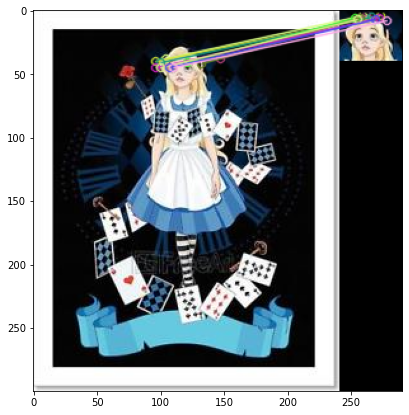

In [179]:
matches3 = matcher(des1, des3, 500, euclidean)

matches3 = sorted(matches3, key = lambda x:x.distance) 
# Draw first 10 matches. 
img3 = cv2.drawMatches(rgb_img,kp1,test_image2,kp3,matches3[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 

In [ ]:
cropped_image = rgb_img[25:65, 95:145]
plt.imshow(cropped_image)
plt.show()

In [24]:
rgb_img.shape

(300, 241, 3)

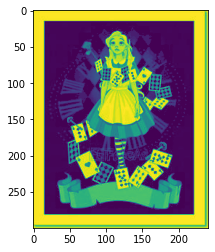

In [23]:
plt.imshow(img)

# DUMP

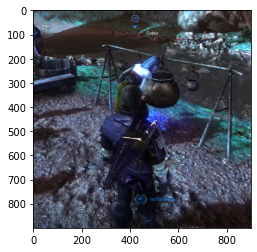

In [184]:
img_2 = cv2.imread('img_2.png',  cv2.IMREAD_COLOR)

plt.imshow(img2)
plt.show()

In [186]:
kp5 = fast.detect(img_2, None)
_, des5 = br.compute(img_2,  kp5)

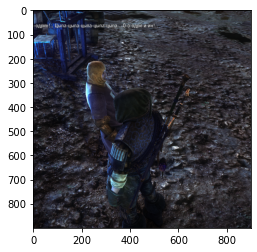

In [185]:
img_3 = cv2.imread('img_3.png',  cv2.IMREAD_COLOR)

plt.imshow(img_3)
plt.show()

In [188]:
kp6 = fast.detect(img_3, None)
_, des6 = br.compute(img_3,  kp6)

In [191]:
des5.shape

(30407, 64)

In [192]:
des6.shape

(28457, 64)

In [ ]:
matches5 = matcher(des5, des6, 500, euclidean)

In [ ]:
len(matches5)

In [ ]:


matches5 = sorted(matches5, key = lambda x:x.distance) 
# Draw first 10 matches. 
img3 = cv2.drawMatches(img_2, kp5, img_3, kp6, matches5[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.figure(figsize=(10, 7))
plt.imshow(img3)
plt.show() 

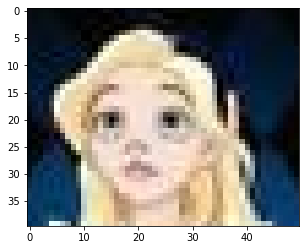

In [40]:
cropped_image = rgb_img[25:65, 95:145]
plt.imshow(cropped_image)
plt.show()

In [26]:
'Breadth First Search or BFS for a Graph'.upper()

'BREADTH FIRST SEARCH OR BFS FOR A GRAPH'